In [68]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


In [48]:
# Load the dataset
df = pd.read_csv('stock_price.csv')


In [49]:
df.head()

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700


In [50]:
df.tail()

,date,close,volume,open,high,low
752,2015/10/21,210.09,4177956.0000,211.99,214.8100,208.80
753,2015/10/20,213.03,14877020.0000,227.72,228.6000,202.00
754,2015/10/19,228.10,2506836.0000,226.50,231.1500,224.94
755,2015/10/16,227.01,4327574.0000,223.04,230.4805,222.87
756,2015/10/15,221.31,2835920.0000,216.43,221.7300,213.70


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    757 non-null    object 
 1   close   757 non-null    float64
 2   volume  757 non-null    object 
 3   open    757 non-null    float64
 4   high    757 non-null    float64
 5   low     757 non-null    float64
dtypes: float64(4), object(2)
memory usage: 35.6+ KB


In [52]:
df.describe()

,close,open,high,low
count,757.000000,757.000000,757.000000,757.000000
mean,272.645614,272.760659,277.122776,268.017399
std,58.378585,58.449827,59.194761,57.515736
min,143.670000,142.320000,154.970000,141.050000
25%,219.560000,219.640000,222.569000,216.080000
50%,277.450000,277.625000,280.789900,273.550000
75%,322.690000,321.560000,327.120000,316.560100
max,385.000000,386.690000,389.610000,379.345000


In [62]:
# Split the data into training and testing sets
df_enclosed = pd.get_dummies(df)
X = df_enclosed.drop('close', axis=1)
y = df_enclosed['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
rf_regressor = RandomForestRegressor()




In [64]:
# Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
y_pred = rf_regressor.predict(X_test)


In [69]:
mape = mean_absolute_percentage_error(y_test,y_pred)
accuracy = 100 - mape
print('Accuracy: ',accuracy)

Accuracy:  99.99003200592674


In [70]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)





Mean Squared Error: 17.095078563733534


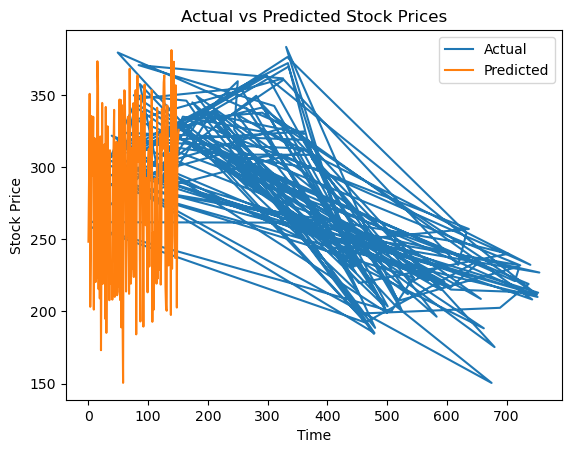

In [71]:
import matplotlib.pyplot as plt

# Plot the predicted and actual stock prices
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')

# Add a legend
plt.legend()

# Show the plot
plt.show()
